# Проект: Принятие решений в Бизнесе

**Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Приоритизируем гипотезы, запустите A/B-тест и проанализируем результаты.**

# План работы:

1. Подготовка к работе
    1. Выведем таблицы и изучим данные
    2. Предобработка данных
2. Приоритизация гипотез
    1. Применим фреймворк ICE для приоритизации гипотиз
    2. Применим фреймворк RICE для приоритизации гипотиз
    3. Вывод
3.	Анализ A/B-теста
    1. Построим график кумулятивной выручки по группам.
    2. Построим график кумулятивного среднего чека по группам.
    3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
    4. Построим график кумулятивного среднего количества заказов по группам.
    5. Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A.
    6. Построим точечный график количества заказов по пользователям.
    7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
    8. Построим точечный график стоимостей заказов.
    9. Построим 95-й и 99-й перцентили стоимости заказов.
    10. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.
    11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
    12. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.
    13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
    14. Примем решение по результатам теста
    


## Подготовка к работе

### Выведем таблицы и изучим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats


In [2]:
# снимем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders =     pd.read_csv('/datasets/orders.csv')
visitors =   pd.read_csv('/datasets/visitors.csv')

In [4]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
visitors.info()
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**Вывод**: С таблицами ознакомились. Нужно исправить: типы данных и наименование столбцов.

### Предобработка данных

#### Приведение столбцов к единому стилю

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace('id', '_id')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


#### Изменение типов столбцов с датами 

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

#### Проверка дубликатов 

In [12]:
visitors.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

**Вывод:** В таблицах дублекатов не обноружено.

#### Проверка результатов тестирования на участие пользователей в двух группах сразу.

In [14]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

**Вывод:** При проверке данных на пользовательскую уникальность в группах, выявлены 58 пользователей, которые попали в обе группы. Принято решение не исключать их из A/B тестирования, т.к. они не повлияют на конечный результат теста.

## Приоритизация гипотез

Применим два фреймворка ICE и RICE для приоритизации гипотиз:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

### Применим фреймворк ICE для приоритизации гипотиз

In [16]:
hypothesis['ice']= (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [17]:
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Применим фреймворк RICE для приоритизации гипотиз

In [18]:
hypothesis['rice']= (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [19]:
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод

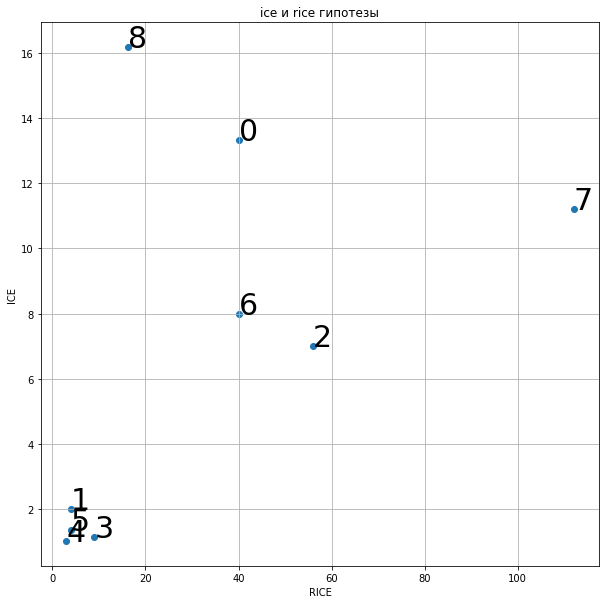

In [20]:
y = hypothesis['ice'] 
z = hypothesis['rice'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ice и rice гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.grid()    

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

Порядок гипотез изменился после применения фреймворка RICE, в отличии от ICE. Разница приоритизаций заключается в том, что одна учитывает кол-во пользователей, которых затронут изменения, а другая - нет.

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам

Для того, чтобы построит график кумулятивной выручки по группам, потребуется собрать датафрейм содержащий информацию о группе (А или В), дате, кумулятивных количестве заказов и пользователей их оформивших, среднем чеке и, о кумулятивном количестве посетителей магазина.

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [22]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : 'nunique',
        'visitor_id' : 'nunique',
        'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

ordersAggregated.head(5)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [23]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = (
    ordersAggregated
    .merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


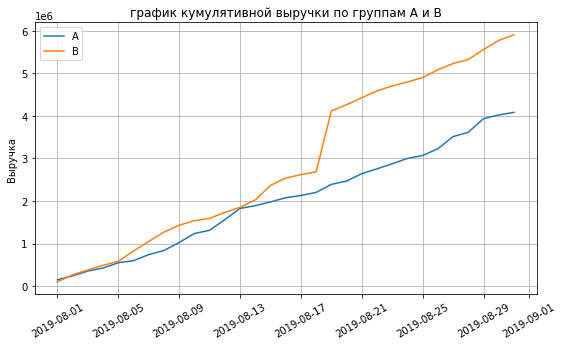

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(9, 5))
plt.grid(True)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('график кумулятивной выручки по группам А и В')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод:** Кумулятивная выручка группы А растет линейно и она меньше чем у группы В. У группы В есть резкий всплеск в районе 18 августа 2017г., возможно это всплеск числа заказов или появление очень дорогих заказов.

### Построим график кумулятивного среднего чека по группам

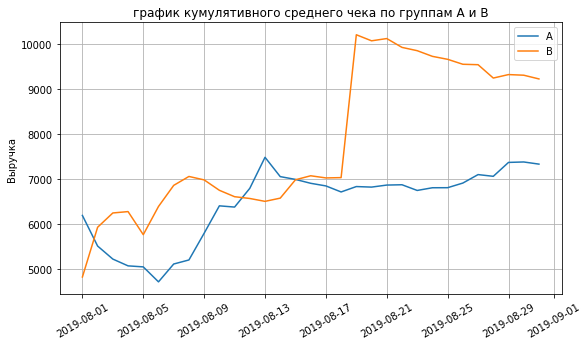

In [26]:
plt.figure(figsize=(9, 5))
plt.grid(True)
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод:** После определенного накопления данных, средний чек группа А стабилизировалась. Группа В показала резкий всплеск 18 августа, что подтверждает версию дорогой покупки.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

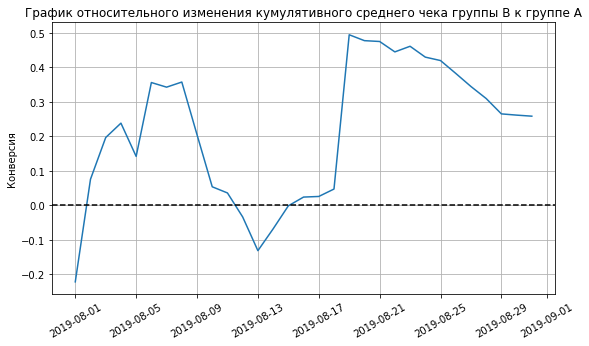

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB,
                        left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
# cтроим отношение средних чеков
plt.figure(figsize=(9, 5))
plt.grid(True)
plt.plot(
    mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']
          /mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']
           /mergedCumulativeRevenue['ordersA'])-1
    )

# добавляем ось X
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel("Конверсия")
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=30)
plt.show()

**Вывод:** На графики видны всплески, это указывает на крупные суммы в одном чеке.

### Построим график кумулятивного среднего количества заказов по группам.

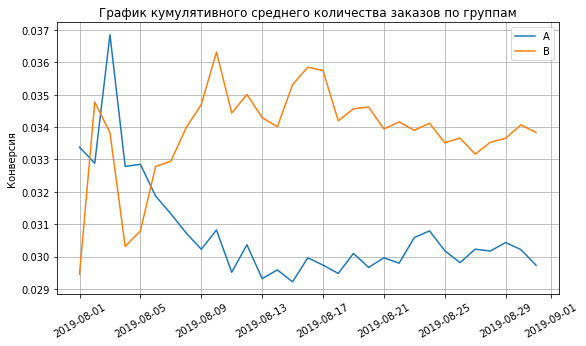

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(9, 5))
plt.grid(True)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов по группам')
plt.ylabel("Конверсия")
plt.xticks(rotation=30)
plt.show()

**Вывод:** Конверсия группы В на графики выглядит более привлекательной.

### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A.

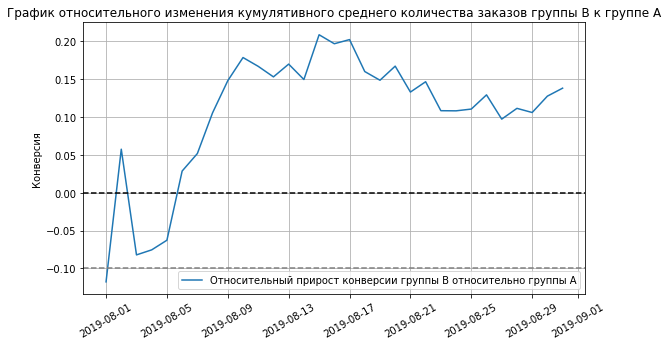

In [29]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                      left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(9, 5))
plt.grid(True)
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.ylabel("Конверсия")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=30)
plt.show()

**Вывод:** В начале теста группа А лидировала, но затем вторая группа стремительно начала рост. После стремительного подъема Группа В скорректировалась и вновь продолжила рост. Потребуются более детальный анализ данных после чистки от выбросов, т.к. по предыдущим графикам видно то, что были крупные заказы во второй группе, которые искажают статистику.

### Построим точечный график количества заказов по пользователям.

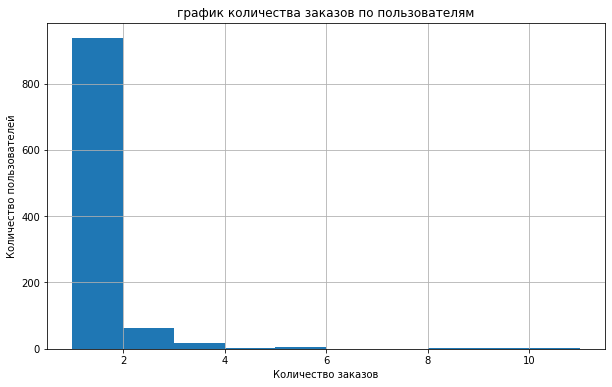

In [30]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.hist(orders_by_users['orders']) 
plt.title('график количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

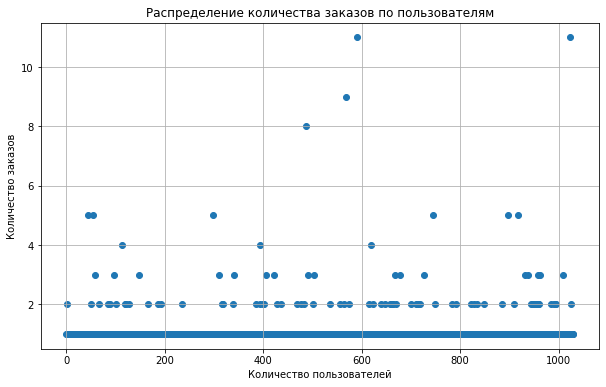

In [31]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.show()

**Вывод:** Все, как и предполагалось: есть немного пользователей, которые заказали больше двух раз. По графику можно выбрать границу аномальных значений между 2 и 4 заказов. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

Для подсчёта перцентилей применяют метод percentile() библиотеки Numpy

In [32]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

**Вывод:** Мы видим, что не более 5% процентов пользователей совершали больше двух покупок в течении тестирования. И только 1% совершали четыре и больше покупки.

**Возьмем за верхнюю границу четыре заказа на одного пользователя.**

### Построим точечный график стоимостей заказов.

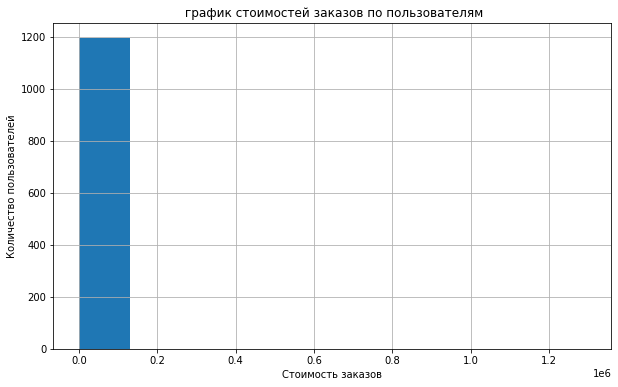

In [33]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.hist(orders['revenue']) 
plt.title(' график стоимостей заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

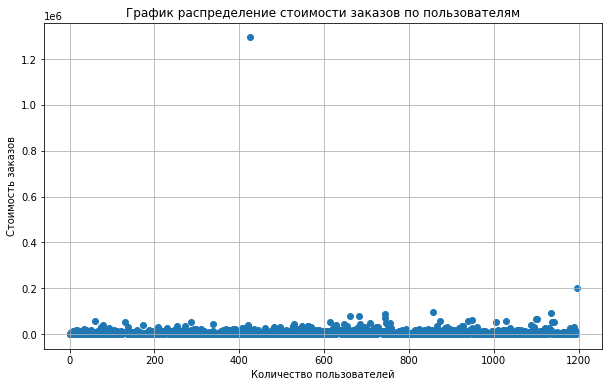

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, orders['revenue'])
plt.title('График распределение стоимости заказов по пользователям')
plt.show()

**Вывод:** На точечном графике мы видим огромный заказ, который исказил графики по кумулятивные выручки. Есть еще несколько заказов которые могут исказить результат исследования

### Построим 95-й и 99-й перцентили стоимости заказов.

Для подсчёта перцентилей применяют метод percentile() библиотеки Numpy

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** Менее 5% пользователей совершали покупка дороже 28000, и только 1% совершили покупки дороже 58233

**Возьмем за верхнюю границу 58233 стоимости одного заказа.**

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.

В начале анализа мы оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы. Нашли выбросы и границу для их определения.

**Сформулируем гипотезы:**

**Нулевоя:** различий в среднем количестве заказов между группами нет.

**Альтернативаня:**  различия в среднем количестве заказов между группами есть.

**Уровень значимости:** установим стандартный уровень статистической значимости, равный 0.05

#### Начнём с подготовки данных:

In [36]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_sum_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_sum_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_sum_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_sum_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_daily_a,revenue_sum_date_a,orders_daily_b,revenue_sum_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Названия столбцов данных:**

date — дата;

orders_daily_a — количество заказов в выбранную дату в группе A;

revenue_sum_date_a — суммарная выручка в выбранную дату в группе A;

orders_daily_a — количество заказов в выбранную дату в группе B;

revenue_sum_date_b — суммарная выручка в выбранную дату в группе B;

orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;

revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;

orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;

revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;

visitors_per_date_a — количество пользователей в выбранную дату в группе A;

visitors_per_date_b — количество пользователей в выбранную дату в группе B;

visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;

visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

#### Создадим переменные orders_by_users_a и orders_by_users_b

со столбцами 'visitor_id', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [37]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

#### Объявим переменные sample_a и sample_b

в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [38]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

#### Применим критерий Манна-Уитни

**Для удобства и дальнейшего использования создадим функцию Критерия Манна-Уитни**

In [39]:
# Функция для проверки гипотезы
def Hypothesis_test(dt_a, dt_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(dt_a, dt_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(dt_b.mean() / dt_a.mean()-1))

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1, округлив до трёх знаков после запятой.

In [40]:
Hypothesis_test(sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


**Вывод:** По «сырым» данным между группами есть различие. P-value = 0.017 меньше стандартного значения (0,05), по этому нулевую гипотезу мы отвергаем. Относительный прирост группы B равен 13,81%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Сформулируем гипотезы:**

**Нулевоя:** различий в среднем чеке между группами нет.

**Альтернативаня:**  различия в среднем чеке между группами есть.

**Уровень значимости:** установим стандартный уровень статистической значимости, равный 0.05

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. И найдём относительные различия в среднем чеке между группами.

In [41]:
Hypothesis_test(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


**Вывод:** По «сырым» данным, P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A. разница в 26% не является статистически значимой

### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — users_with_many_orders и пользователей, совершивших заказы дороже 58233 — users_with_expensive_orders. Объединим их в таблице abnormal_users

In [42]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print (abnormal_users)
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
278     2458001652
940     4003628586
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, dtype: int64


15

Всего 15 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами.

**Сформулируем гипотезы:**

**Нулевоя:** различий в среднем количестве заказов между группами нет.

**Альтернативаня:**  различия в среднем количестве заказов между группами есть.

**Уровень значимости:** установим стандартный уровень статистической значимости, равный 0.05

In [43]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [44]:
Hypothesis_test(sample_a_filtered, sample_b_filtered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


**Вывод:** По очищенным данным между группами есть различие. P-value = 0.014 меньше стандартного значения (0,05), по этому нулевую гипотезу мы отвергаем. Относительный прирост группы B равен 15,331%. Результаты по среднему количеству заказов практически не изменились

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Сформулируем гипотезы:**

**Нулевоя:** различий в среднем чеке между группами нет.

**Альтернативаня:**  различия в среднем чеке между группами есть.

**Уровень значимости:** установим стандартный уровень статистической значимости, равный 0.05

In [45]:
Hypothesis_test(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


**Вывод:** P-value увеличился, но причин отвергать нулевую гипотезу нет. Разница между сегментами фактически сравнялась (По «сырым» данным была более 25%)


## Примем решение по результатам теста

На основании входных данных, предоставленных интернет-магазином был проведено исследование и вынесены рекомендации, изложенные ниже.

**В первой части исследования «Приоритизации гипотез» мы применили два Фреймворка ICE и RICE на список гипотез предоставленный отделам маркетинга.**

В первую очередь нужно обратить внимание на гипотезы:
1.	Запустить акцию, дающую скидку на товар в день рождения.
2.	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
3.	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Если, же ранжирование гипотиз должно включать в себя охват пользователей, то приоритеты немого изменятся:

1.	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
2.	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
3.	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**Во второй части исследования «Анализ А/В теста», мы применили критерий Манна-Уитни к «сырым» и «очищенным данным»**

1.	Между группами есть статистически значимое различие по конверсии. Конверсия группы B на ~14% выше чем в A, как по «сырым» так, и по отфильтрованным от аномалий данным.
2.	По среднему чеку в группах статистически значимого различия нет, в группе B был разрыв при использовании «сырых» данных за счет аномальных значений.
3.	График относительного изменения кумулятивного среднего количества заказов группы B к группе A показывает, что результаты группы B стабильно лучше группы А.

# Вывод:
**На основании проведенного исследования группа B победила, у нее конверсия выше, стабильно выше группы А. Рекомендуем завершить тест.**
